In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pickle
from modularities_notebooks.modularity import clustered_connections, print_weight_matrix, compute_density_matrix, plot_connection_matrices
from sklearn.preprocessing import StandardScaler
import torch

In [70]:
with open('experimental_data/all_mod_data2.pkl','rb') as f:
    dict = pickle.load(f)
df1 = pd.DataFrame(dict)

In [104]:
top_acc = pd.DataFrame()
for layer in layer_names:
    for value in values:
        local_top_acc = df1[[col for col in list(df1.keys()) if 'test' in col and value in col and layer in col]].max().values[:4]
        colname = f'{value}{layer}'
        top_acc[colname]= local_top_acc

In [107]:
top_acc

,0.0layer1,0.25layer1,0.5layer1,0.75layer1,1.0layer1,0.0layer2,0.25layer2,0.5layer2,0.75layer2,1.0layer2,...,0.0layer7,0.25layer7,0.5layer7,0.75layer7,1.0layer7,0.0layer8,0.25layer8,0.5layer8,0.75layer8,1.0layer8
0,0.996667,1.000000,1.000000,0.996667,0.990000,1.0,1.0,1.0,1.0,1.000000,...,0.943333,0.880000,0.963333,0.946667,0.983333,0.896667,0.943333,0.970000,0.960000,0.986667
1,0.990000,0.996667,0.986667,0.996667,0.990000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,0.946667,0.990000,1.000000,0.986667,0.896667,0.986667,0.903333,0.933333,0.986667
2,1.000000,0.996667,1.000000,0.996667,0.990000,1.0,1.0,1.0,1.0,0.996667,...,0.956667,0.930000,0.953333,0.983333,0.993333,0.970000,0.960000,0.953333,0.973333,0.993333
3,0.996667,0.996667,0.996667,1.000000,0.976667,1.0,1.0,1.0,1.0,1.000000,...,0.976667,1.000000,0.936667,0.986667,0.990000,0.970000,0.956667,0.890000,0.953333,0.993333


In [116]:
dict

dict

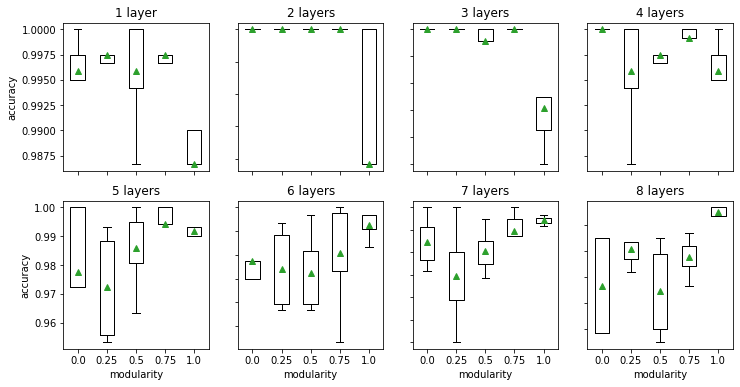

In [144]:
count= 0
#for color in ['red','blue','purple','black','pink','green','yellow','magenta']:

 #   c = 'black'
 #   plt.boxplot(top_acc.iloc[:,count:count+5], widths=.1, patch_artist=True,
  #              boxprops=dict(facecolor=c, color=c),
   #             capprops=dict(color=c),
    ##          medianprops=dict(color=c),
    #        )
   # count+=5
    

plt.rcParams["figure.figsize"] = (12,6)
fig, axs = plt.subplots(2,4)

count = 0
count2 = 0
for i in range(2):
    for j in range(4):
        medianprops = dict(linestyle='-.', linewidth=0, color='white')
        axs[i,j].boxplot(top_acc.iloc[:,count2:count2+5], widths=.5,showfliers=False,showmeans=True,medianprops=medianprops)
        axs[i,j].set(ylabel='accuracy')
        axs[i,j].set(xlabel='modularity')
        axs[i,j].set(title=f'{layer_names[count][-1]} layer' if layer_names[count][-1] =='1' else f'{layer_names[count][-1]} layers')
        axs[i,j].set_xticklabels(['0.0','0.25','0.5','0.75','1.0'])
        count+=1
        count2+=5

for ax in axs.flat:
    ax.label_outer()

In [73]:
for layer in layer_names:
    print(df1[[col for col in list(df1.keys()) if 'test' in col and '0.0' in col and layer in col]].mean(axis=0))

test_modularity=0.0_rep0layer1    0.665667
test_modularity=0.0_rep1layer1    0.717500
test_modularity=0.0_rep2layer1    0.698167
test_modularity=0.0_rep3layer1    0.677667
test_modularity=0.0_rep4layer1    0.728833
dtype: float64
test_modularity=0.0_rep0layer2    0.816778
test_modularity=0.0_rep1layer2    0.785667
test_modularity=0.0_rep2layer2    0.838556
test_modularity=0.0_rep3layer2    0.821222
test_modularity=0.0_rep4layer2    0.812222
dtype: float64
test_modularity=0.0_rep0layer3    0.817444
test_modularity=0.0_rep1layer3    0.823444
test_modularity=0.0_rep2layer3    0.841222
test_modularity=0.0_rep3layer3    0.819333
test_modularity=0.0_rep4layer3    0.821000
dtype: float64
test_modularity=0.0_rep0layer4    0.805556
test_modularity=0.0_rep1layer4    0.794111
test_modularity=0.0_rep2layer4    0.750444
test_modularity=0.0_rep3layer4    0.739000
test_modularity=0.0_rep4layer4    0.792778
dtype: float64
test_modularity=0.0_rep0layer5    0.794444
test_modularity=0.0_rep1layer5    0.7

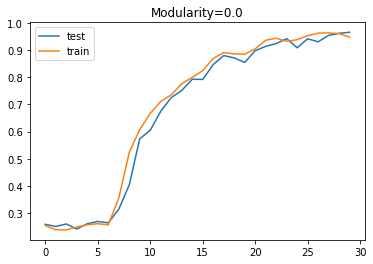

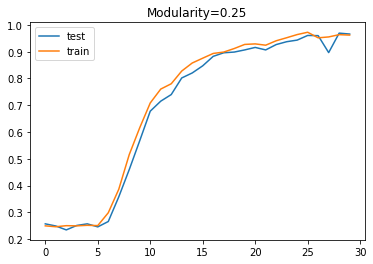

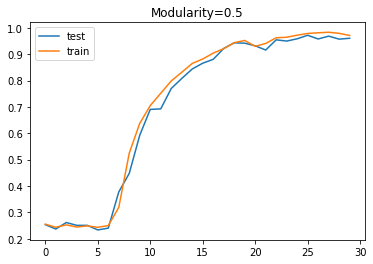

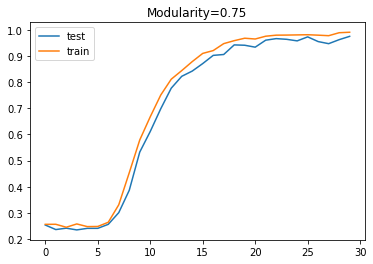

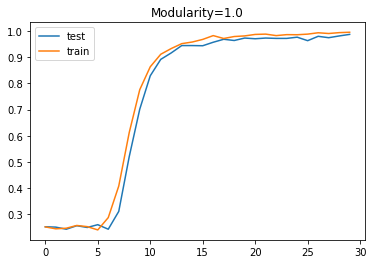

In [65]:
metric = 'test'
values = ['0.0','0.25','0.5','0.75','1.0']
layer = 'layer8'
layer_names = [f'layer{i}' for i in range(1,9)]

def plot_stuff(metric,values,layer):
    for value in values:
        mean_df = df1[[col for col in list(df1.keys()) if 'test' in col and value in col and layer in col]].mean(axis=1)
        mean_df_train = df1[[col for col in list(df1.keys()) if 'train' in col and value in col and layer in col]].mean(axis=1)
        min_df = df1[[col for col in list(df1.keys()) if metric in col and value in col and layer in col]].min(axis=1)
        max_df = df1[[col for col in list(df1.keys()) if metric in col and value in col and layer in col]].max(axis=1) 
        #plt.plot(mean_df,label=round(mean_df.max(),3))
        plt.plot(mean_df,label='test')
        plt.plot(mean_df_train,label='train')
        #plt.fill_between(df1.index,min_df,max_df,alpha=.2)
        #plt.title(f'{layer[-1]} hidden layer' if layer[-1] == '1' else f'{layer[-1]} hidden layers'  )
        plt.title(f'Modularity={value}')
        plt.legend()
        plt.show()
#for name in layer_names:
plot_stuff(metric,values,'layer6')

In [67]:
gap_df = pd.DataFrame()
for layer in layer_names:
    gapcolumn = []
    for value in values:


        max_acc_test = df1[[col for col in list(df1.keys()) if 'test' in col and value in col and layer in col]].mean(axis=1).max()
        max_acc_train = df1[[col for col in list(df1.keys()) if 'train' in col and value in col and layer in col]].mean(axis=1).max()
        train_test_gap = max_acc_train-max_acc_test
        gapcolumn.append(train_test_gap)
    gap_df[layer] = gapcolumn


<AxesSubplot:>

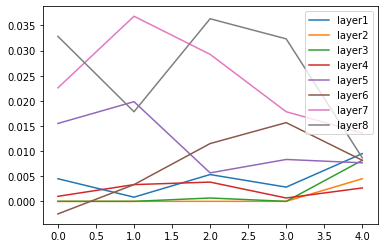

In [69]:
gap_df.plot()

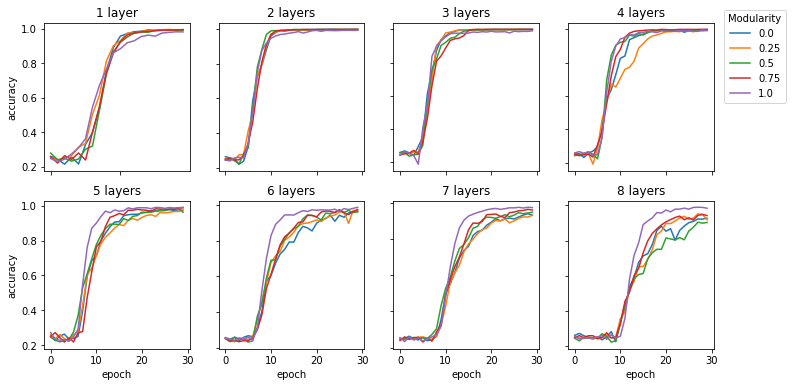

In [46]:
plt.rcParams["figure.figsize"] = (12,6)
fig, axs = plt.subplots(2,4)

count = 0
for i in range(2):
    for j in range(4):
        for value in values:
            mean_df = df1[[col for col in list(df1.keys()) if metric in col and value in col and layer_names[count] in col]].mean(axis=1)
            axs[i,j].plot(mean_df,label=value)
            axs[i,j].set(ylabel='accuracy')
            axs[i,j].set(xlabel='epoch')
            axs[i,j].set(title=f'{layer_names[count][-1]} layer' if layer_names[count][-1] =='1' else f'{layer_names[count][-1]} layers')
            if count == 3 or count == 3:
                legend = axs[i,j].legend(bbox_to_anchor=(1.04,1.12))
                legend.set_title('Modularity')
        count+=1

for ax in axs.flat:
    ax.label_outer()

In [51]:
def get_Ws(N,nb_classes,epsilon=1, modularity =1,base_w = 1,w = 1,plot=True):
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f'device: {device}')
    else:
        device = torch.device("cpu")
        print(f'device: {device}')

    n_assemblies = nb_classes
    ss = StandardScaler()
    mask, cluster_ids, _ = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=1./n_assemblies, modularity=modularity)
    mask = (mask* (base_w*w)) + base_w

    W, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=epsilon, modularity=0.)
    if w > 0.:
        W *= base_w
        W *= mask

    if epsilon ==1:
        W = W-1
    W2 = (W != 0).astype(int)
    if plot:
        plt.figure(figsize=(6,6))
        plt.title(f'Weight Mask. N={N}; modularity={modularity}')
        plt.imshow(W,cmap='viridis')
        plt.colorbar()
        plt.show()
        plt.figure(figsize=(6,6))
        plt.title('Weight Mask: training')
        plt.imshow(W2)
        plt.colorbar()
        plt.show()
    return torch.tensor(W,device=device,dtype=torch.float32), torch.tensor(W2,device=device,dtype=torch.float32)

device: cpu
device: cpu
device: cpu
device: cpu
device: cpu


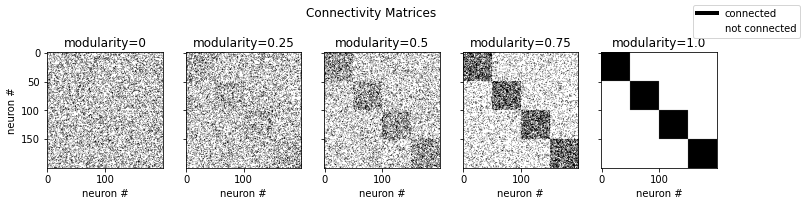

In [83]:
plt.rcParams["figure.figsize"] = (12,3)
fig,axs = plt.subplots(1,5)
fig.suptitle('Connectivity Matrices')

for i,mod in enumerate([0,0.25,0.5,0.75,1.0]):
    W,W2 = get_Ws(200,4,1,modularity=mod,plot=False)
    #axs[i].axis('off')
    axs[i].imshow(W,cmap='binary')
    #axs[i].imshow(W)
    axs[i].set(title=f'modularity={mod}')
    axs[i].set(xlabel='neuron #')
    axs[i].set(ylabel='neuron #')
    

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=4),
                Line2D([0], [0], color='white', lw=4)]



fig.legend(custom_lines, ['connected', 'not connected'])
    
for ax in axs.flat:
    ax.label_outer()



In [101]:
epoch_until_max_acc = df1[[col for col in list(df1.keys()) if 'test' in col and 'layer' in col]].idxmax(axis=0)
max_acc = df1[[col for col in list(df1.keys()) if 'test' in col and 'layer' in col]].max(axis=0)

In [135]:
epoch_until_max_acc[[col for col in list(epoch_until_max_acc.keys()) if '0.5' in col and 'layer7' in col]].mean()

26.2

In [170]:
mean_acc_series = df1[[col for col in list(df1.keys()) if 'test' in col and 'layer' in col]].mean(axis=0)
sum_acc_series = df1[[col for col in list(df1.keys()) if 'test' in col and 'layer' in col]].sum(axis=0)

In [171]:
sum_acc_series

test_modularity=0.0_rep0layer1     13.313333
test_modularity=0.25_rep0layer1    14.140000
test_modularity=0.5_rep0layer1     14.186667
test_modularity=0.75_rep0layer1    13.996667
test_modularity=1.0_rep0layer1     13.720000
                                     ...    
test_modularity=0.0_rep4layer8     18.373333
test_modularity=0.25_rep4layer8    18.183333
test_modularity=0.5_rep4layer8     16.463333
test_modularity=0.75_rep4layer8    17.940000
test_modularity=1.0_rep4layer8     19.950000
Length: 225, dtype: float64

test_modularity=0.0_rep0layer1     0.000000
test_modularity=0.25_rep0layer1    0.826667
test_modularity=0.5_rep0layer1     0.873333
test_modularity=0.75_rep0layer1    0.683333
test_modularity=1.0_rep0layer1     0.406667
                                     ...   
test_modularity=0.0_rep4layer8     5.060000
test_modularity=0.25_rep4layer8    4.870000
test_modularity=0.5_rep4layer8     3.150000
test_modularity=0.75_rep4layer8    4.626667
test_modularity=1.0_rep4layer8     6.636667
Length: 225, dtype: float64

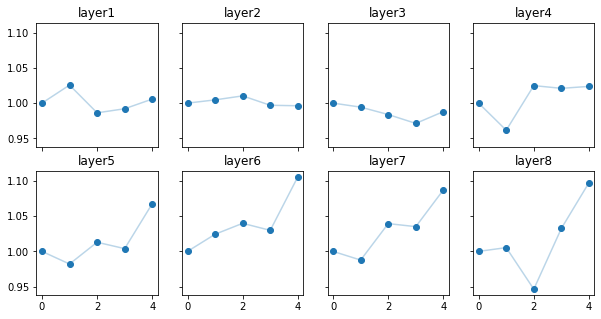

In [194]:
plt.rcParams["figure.figsize"] = (10,5)

sum_acc_series[[col for col in list(epoch_until_max_acc.keys()) if value in col and name in col]].mean()

fig,axs = plt.subplots(2,4,sharey=True)
for j,name in enumerate(layer_names): 
    meanmean = np.zeros(5)
    for i,value in enumerate(['0.0','0.25','0.5','0.75','1.0']):
    #for i,value in enumerate(['0.0','1.0']):
        meanmean[i] = sum_acc_series[[col for col in list(epoch_until_max_acc.keys()) if value in col and name in col]].mean()
    meanmean = meanmean/meanmean[0]
    if j <4:
        axs[0,j].scatter([i for i in range(5)],meanmean,label=name)
        axs[0,j].plot(meanmean,alpha=.3)
        axs[0,j].set(title=name)
        #axs[0,j].set_xticks([float(value) for value in values])
    else:
        axs[1,j-4].scatter(np.array([i for i in range(5)]),meanmean,label=name)
        axs[1,j-4].plot(meanmean,alpha=.3)
        axs[1,j-4].set(title=name)
for ax in axs.flat:
    ax.label_outer()
    
    #plt.scatter([i for i in range(5)],meanmean,label=name)
    #plt.plot(meanmean,alpha=.3)
    #plt.legend()

In [159]:
mean_acc_series

test_modularity=0.0_rep0layer1     0.665667
test_modularity=0.25_rep0layer1    0.707000
test_modularity=0.5_rep0layer1     0.709333
test_modularity=0.75_rep0layer1    0.699833
test_modularity=1.0_rep0layer1     0.686000
                                     ...   
test_modularity=0.0_rep4layer8     0.612444
test_modularity=0.25_rep4layer8    0.606111
test_modularity=0.5_rep4layer8     0.548778
test_modularity=0.75_rep4layer8    0.598000
test_modularity=1.0_rep4layer8     0.665000
Length: 225, dtype: float64

In [4]:
with open('experimental_data/lr.pkl','rb') as f:
    dictlr = pickle.load(f)
lr1 = pd.DataFrame(dictlr)

In [21]:
lrs = ['0.0001','0.0005','0.001','0.005','0.01','0.05','0.1','0.5','=1']
dflrs = pd.DataFrame()
for value in lrs:
    name = f'lr{value}'
    dflrs[name] = min_loss_lrs[[col for col in min_loss_lrs.keys() if value in col]].values
    

In [37]:
lrs2 = ['0.0001','0.0005','0.001','0.005','0.01','0.05','0.1','0.5','1']

In [20]:
min_loss_lrs[[col for col in min_loss_lrs.keys() if value in col]].values

array([16.30282  ,  1.3932537,  1.3989606], dtype=float32)

In [41]:
dflrs.mean()

lr0.0001    1.156454
lr0.0005    0.023173
lr0.001     0.003234
lr0.005     0.057102
lr0.01      0.023395
lr0.05      1.398164
lr0.1       6.194293
lr0.5       6.653403
lr=1        6.365011
dtype: float32

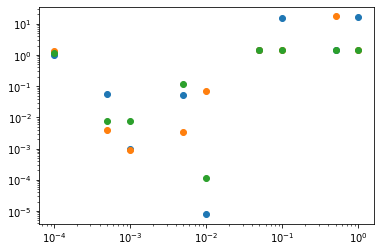

In [40]:
plt.scatter(np.array(lrs2).astype(float),dflrs.loc[0])
plt.scatter(np.array(lrs2).astype(float),dflrs.loc[1])
plt.scatter(np.array(lrs2).astype(float),dflrs.loc[2])

plt.yscale('log')
plt.xscale('log')

In [9]:
min_loss_lrs = lr1[[col for col in lr1.keys() if 'loss' in col]].min()
lr1[[col for col in lr1.keys() if 'loss' in col]].min()